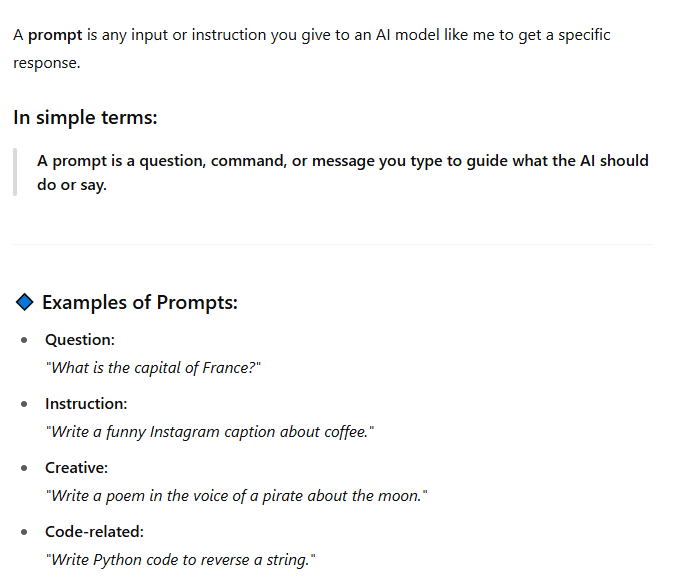

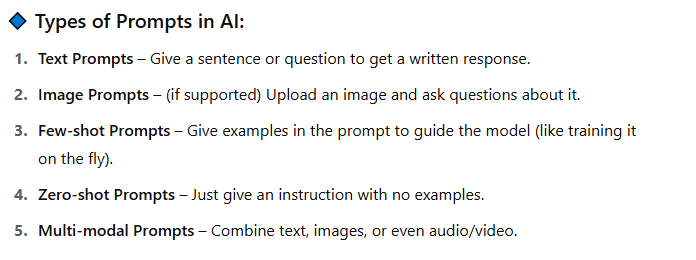

# <b> Other types of Prompts

### <b>1. Dynamic and Resubale Prompt

## 🔹 What is a Dynamic and Reusable Prompt?

A **dynamic prompt** contains **placeholders (variables)** that get filled in at runtime, allowing you to:

- Reuse the same prompt structure across tasks.
- Dynamically inject different user input or data.
- Keep your code clean and modular.

## ✅ Example Using LangChain

LangChain uses `PromptTemplate` to create dynamic and reusable prompts.

### 🔸 Step 1: Import & Setup

```python

from langchain.prompts import PromptTemplate

```

---

### 🔸 Step 2: Define a Dynamic Prompt

```python

prompt = PromptTemplate(
    input_variables=["topic"],
    template="Write a short paragraph about {topic}."
)

```

This is reusable because the `{topic}` is dynamic — you can use this same prompt for any topic.

---

### 🔸 Step 3: Format with Actual Input

```python

formatted_prompt = prompt.format(topic="Artificial Intelligence")
print(formatted_prompt)

```

🖨️ Output:

```

Write a short paragraph about Artificial Intelligence.

```

---

### 🔸 Step 4: Use with LLM
```python

from langchain.llms import OpenAI  # or use Ollama, HuggingFace, etc.

llm = OpenAI()  # You must have your API key set
response = llm(formatted_prompt)
print(response)

```

## 🧠 Why Use Dynamic Prompts in LangChain?

- ✅ Cleaner code with templates.
- ✅ Easier debugging and experimentation.
- ✅ Works well with **agents**, **tools**, **chains**, and **RAG pipelines**.
- ✅ Centralized control of prompt logic.

---

## 🔁 Bonus: Prompt with Multiple Variables

```python
python
CopyEdit
prompt = PromptTemplate(
    input_variables=["name", "product"],
    template="Write a thank you message to {name} for buying {product}."
)

print(prompt.format(name="Vikas", product="a smartwatch"))

```

🖨️ Output:

```
css
CopyEdit
Write a thank you message to Vikas for buying a smartwatch.

```

---

## 🔧 Summary

| Term | Meaning |
| --- | --- |
| `PromptTemplate` | LangChain class to define reusable prompts |
| `input_variables` | Placeholders in the prompt (e.g., `{topic}`) |
| `format()` | Replaces placeholders with actual values |

# step by step code

In [9]:

!pip install langchain
!pip install langchain_community
!pip install langchain_ollama

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 10.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15/15 [langchain_community]ngchain_community]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [langchain_ollama]


In [17]:
# step1
from langchain.prompts import PromptTemplate

In [18]:
# step2
prompt=PromptTemplate(
    input_variables=["topic"],
    template=" write a short paragrah about {topic}."
)

In [19]:
# step3
formatted_input1=prompt.format(topic="Artificial Intelligenece")
print(formatted_input1)

 write a short paragrah about Artificial Intelligenece.


In [20]:
# step4
from langchain_ollama.chat_models import ChatOllama
# Initialize the Ollama model with your ngrok public URL
llm = ChatOllama(
    base_url="https://28a82ea6a9ac.ngrok-free.app",
    model="mistral:7b",
    stream=False,
    num_gpu=100,


)

result=llm.invoke(formatted_input1)
result.content

' Artificial Intelligence (AI) is a branch of computer science that aims to create intelligent machines capable of performing tasks that would normally require human intelligence. This involves developing algorithms and models that can learn, reason, problem-solve, perceive, and make decisions based on data and information. AI has the potential to revolutionize various sectors, including healthcare, finance, transportation, and education, by automating routine tasks, improving efficiency, and generating insights from vast amounts of data. However, it also raises ethical concerns about privacy, job displacement, and the potential misuse of powerful AI systems. As we continue to advance in this field, striking a balance between technological progress and responsible AI development will be crucial.'

🔁 Bonus: Prompt with Multiple Variables

In [21]:
# step2
prompt=PromptTemplate(
    input_variables=["name",'product'],
    template=" write a thank you message to {name} for buying {product}."
)
print(prompt)

input_variables=['name', 'product'] input_types={} partial_variables={} template=' write a thank you message to {name} for buying {product}.'


In [22]:
# step3:
formatted_input2=prompt.format(name="vikas",product="a smartwatch")
print(formatted_input2)

 write a thank you message to vikas for buying a smartwatch.


In [23]:

# step4
from langchain_ollama.chat_models import ChatOllama
# Initialize the Ollama model with your ngrok public URL
llm = ChatOllama(
    base_url="https://28a82ea6a9ac.ngrok-free.app",
    model="mistral:7b",
    stream=False,
    num_gpu=100,


)

result=llm.invoke(formatted_input2)
result.content

" Subject: Heartfelt Thanks for Your Smart Purchase! 🕒\n\nDear Vikas,\n\nI hope this message finds you well. I am writing to express my sincere gratitude for your recent purchase of our smartwatch. It's customers like you who make our hard work worthwhile.\n\nYour new smartwatch is not just a gadget, but a perfect blend of style and technology, designed to simplify your daily life and keep you connected on the go. We are confident that it will serve you well, and we are eager to hear about your experiences with it.\n\nThank you once again for choosing our brand. Your support means a lot to us, and we look forward to serving you better in the future. If you have any questions or need assistance, please do not hesitate to reach out. We are always here to help!\n\nWishing you many enjoyable moments with your new smartwatch. Keep smiling, stay connected, and let technology make life easier for you! 😊\n\nBest Regards,\n\n[Your Name]\n[Your Position]\n[Your Contact Information]"

# --------------------------------------------------------------------------------------------

# <b>2.Role-Based prompt

### 🧠 What is a **Role-Based Prompt**?

A **role-based prompt** is a technique where you tell the AI to **"act as" a specific persona, expert, or character** before giving it a task.

---

### 🎯 Purpose:

- **Set context and tone**
- **Guide behavior** of the LLM
- Make output **more relevant and believable**

---

## 🔹 Examples of Role-Based Prompts

### 1. **Act as a Doctor**

```
css
CopyEdit
You are a medical expert. A user is experiencing frequent headaches and dizziness. Suggest possible causes and whether they should visit a doctor.

```

---

### 2. **Act as a Python Tutor**

```
pgsql
CopyEdit
You are a friendly Python tutor. Explain how the `for` loop works to a 12-year-old who is new to coding.

```

---

### 3. **Act as a Career Counselor**

```
sql
CopyEdit
You are a career counselor. A 25-year-old is confused between pursuing a job in software engineering or data science. Give pros and cons of each.

```

---

## 🔧 In LangChain: Role-Based Prompt Template

You can build role-based prompts using `PromptTemplate`:

```python
python
CopyEdit
from langchain.prompts import PromptTemplate

role_prompt = PromptTemplate(
    input_variables=["role", "task"],
    template="You are a {role}. {task}"
)

prompt = role_prompt.format(
    role="nutritionist",
    task="Give a healthy 1200-calorie meal plan for a vegetarian."
)

print(prompt)

```

🖨️ Output:

```
css
CopyEdit
You are a nutritionist. Give a healthy 1200-calorie meal plan for a vegetarian.

```

---

## ✅ Benefits of Role-Based Prompts

| Feature | Benefit |
| --- | --- |
| 🎭 Persona control | Makes the model respond more like a human with expertise |
| 💬 Tone consistency | Sets a professional, casual, or technical tone |
| 🎯 Task guidance | Makes the model’s output more relevant and accurate |

---

## 💡 Tips for Effective Role Prompts

- Be **explicit**: “You are an expert in X.”
- Combine with **instructional prompts**: “Explain Y in a simple way.”
- Use it in **chat memory** to maintain consistent role.

with the chelp of ChatPromptTemplate

### ChatGPT said:

Great! Let’s now explore how to build **role-based prompts** using **`ChatPromptTemplate`** from **LangChain**, which is specially designed for **chat-based models** like GPT-3.5, GPT-4, Claude, or Llama3.

---

## ✅ What is `ChatPromptTemplate`?

`ChatPromptTemplate` allows you to structure prompts **as a series of chat messages** with roles like:

- `system`: defines the assistant’s behavior or role
- `user`: user’s input
- `assistant`: optional message history

---

## 🔹 Goal: Role-Based Prompt using `ChatPromptTemplate`

Let’s say we want the AI to act as a **doctor**, and respond to a user’s symptoms.

---

### 🔸 1. **Install LangChain**

```bash
bash
CopyEdit
pip install langchain openai

```

---

### 🔸 2. **Code Example**

```python
python
CopyEdit
from langchain.prompts import ChatPromptTemplate, SystemMessagePromptTemplate, HumanMessagePromptTemplate

# Define role in system prompt
system_template = "You are a helpful and experienced {role}."
system_message = SystemMessagePromptTemplate.from_template(system_template)

# Define user message (dynamic)
human_template = "{user_input}"
human_message = HumanMessagePromptTemplate.from_template(human_template)

# Combine into ChatPromptTemplate
chat_prompt = ChatPromptTemplate.from_messages([system_message, human_message])

# Format it with input variables
formatted = chat_prompt.format_messages(
    role="doctor",
    user_input="I have had a sore throat and fever for two days. What should I do?"
)

# Print the formatted chat messages
for message in formatted:
    print(f"{message.type.upper()}: {message.content}")

```

---

### 🖨️ Output:

```
vbnet
CopyEdit
SYSTEM: You are a helpful and experienced doctor.
HUMAN: I have had a sore throat and fever for two days. What should I do?

```

This prompt is now ready to be passed to an LLM.

---

### 🔸 3. **Pass to an LLM**

```python
python
CopyEdit
from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)
response = llm(formatted)

print(response.content)

```

---

## 🧠 Why Use `ChatPromptTemplate` for Role-Based Prompts?

| Feature | Benefit |
| --- | --- |
| `system` message | Clearly defines the AI’s **role/behavior** |
| Chat format | Works with **chat LLMs** like GPT-3.5, GPT-4, Claude |
| Structured prompting | Better clarity and control over model responses |

---

## 🔁 Dynamic and Reusable

You can **change the role and input** dynamically:

```python
python
CopyEdit
chat_prompt.format_messages(
    role="fitness coach",
    user_input="I want to lose weight but I don’t want to go to the gym. Suggestions?"
)

```

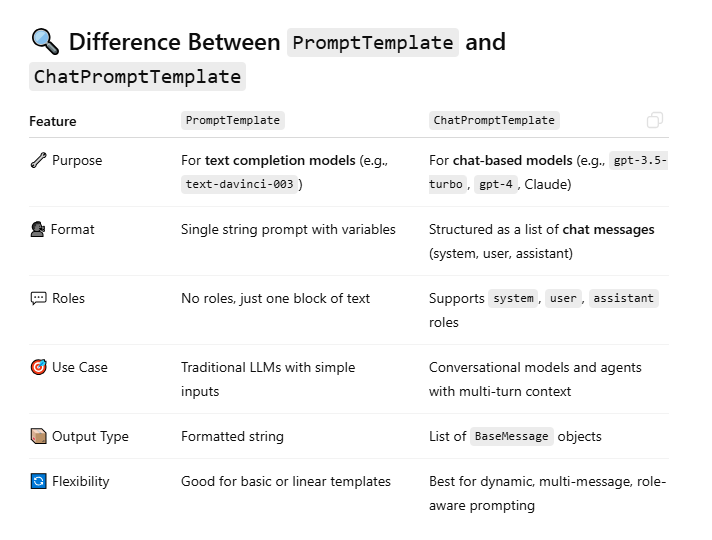